In [35]:
import os
import pandas as pd

In [36]:
# load up the CSV file as a DataFrame
filename = os.path.join('Downloads','eland_output.csv')
df = pd.read_csv(filename)

In [39]:
# show first five to demonstrate what is in the file
df.head(10)

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
0,ASG00073xh,resting,0,0.9998,"{'0': '0.9998', '1': '0.0002'}",97734,eland
1,ASG00073xh,babies,0,0.9887,"{'0': '0.9887', '1': '0.0113'}",97734,eland
2,ASG00073xh,standing,0,0.6387,"{'0': '0.6387', '1': '0.3613'}",97734,eland
3,ASG00073xh,count,2,0.5971,"{'4': '0.0114', '6': '0.0011', '1': '0.2925', ...",97734,eland
4,ASG00073xh,moving,1,0.7161,"{'0': '0.2839', '1': '0.7161'}",97734,eland
5,ASG00073xh,eating,0,0.9632,"{'0': '0.9632', '1': '0.0368'}",97734,eland
6,ASG00073xh,interacting,0,0.9935,"{'0': '0.9935', '1': '0.0065'}",97734,eland
7,ASG00073xh,species,eland,0.5329,"{'bushbuck': '0.0000', 'human': '0.0004', 'vul...",97734,eland
8,ASG00074z4,resting,0,0.9963,"{'0': '0.9963', '1': '0.0037'}",98530,eland
9,ASG00074z4,babies,0,0.9700,"{'0': '0.9700', '1': '0.0300'}",98530,eland


In [40]:
# filter the DataFrame to ONLY contain the species information
df = df[df.label=='species']

In [41]:
df.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
7,ASG00073xh,species,eland,0.5329,"{'bushbuck': '0.0000', 'human': '0.0004', 'vul...",97734,eland
15,ASG00074z4,species,gazellegrants,0.4943,"{'bushbuck': '0.0001', 'human': '0.0004', 'vul...",98530,eland
23,ASG00076pg,species,eland,0.8082,"{'bushbuck': '0.0000', 'human': '0.0000', 'vul...",99176,eland
31,ASG0002rq3,species,gazellethomsons,0.9247,"{'bushbuck': '0.0000', 'human': '0.0004', 'vul...",1115,eland
39,ASG000738p,species,eland,0.9647,"{'bushbuck': '0.0000', 'human': '0.0000', 'vul...",97514,eland


In [67]:
df.prediction_top.value_counts().plot.bar()

eland              1754
hartebeest          366
zebra               200
wildebeest          116
gazellethomsons      44
gazellegrants        35
elephant             31
giraffe              23
buffalo              22
lionfemale           18
topi                 15
impala               13
otherbird            10
hyenaspotted          9
ostrich               7
guineafowl            5
warthog               5
hippopotamus          5
human                 4
lionmale              2
baboon                1
cheetah               1
serval                1
reedbuck              1
koribustard           1
Name: prediction_top, dtype: int64

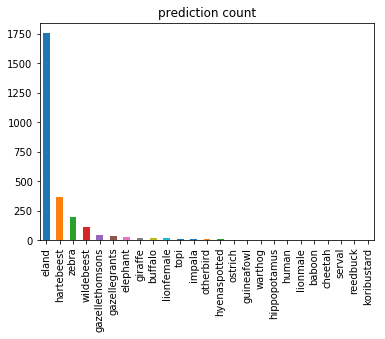

In [69]:
df.prediction_top.value_counts().plot.bar(title='prediction count')

In [55]:
# a quick look at the 'confidence_top' data
df['confidence_top'].describe()

count    2689.000000
mean        0.769764
std         0.229900
min         0.126300
25%         0.587700
50%         0.852500
75%         0.979800
max         1.000000
Name: confidence_top, dtype: float64

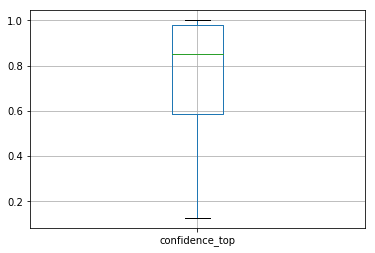

In [66]:
df.boxplot(column='confidence_top', showfliers=False)

In [61]:
# create a new data frame that only contains 'eland' as top prediction
edf = df[df.prediction_top=='eland']
edf.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
7,ASG00073xh,species,eland,0.5329,"{'bushbuck': '0.0000', 'human': '0.0004', 'vul...",97734,eland
23,ASG00076pg,species,eland,0.8082,"{'bushbuck': '0.0000', 'human': '0.0000', 'vul...",99176,eland
39,ASG000738p,species,eland,0.9647,"{'bushbuck': '0.0000', 'human': '0.0000', 'vul...",97514,eland
55,ASG000769d,species,eland,0.5218,"{'bushbuck': '0.0000', 'human': '0.0003', 'vul...",98844,eland
87,ASG0006osa,species,eland,0.9656,"{'bushbuck': '0.0000', 'human': '0.0000', 'vul...",93465,eland


In [62]:
# a quick look at the 'confidence_top' of eland ONLY predictions.
edf['confidence_top'].describe()

count    1754.000000
mean        0.850093
std         0.182690
min         0.229700
25%         0.757675
50%         0.937550
75%         0.991400
max         1.000000
Name: confidence_top, dtype: float64

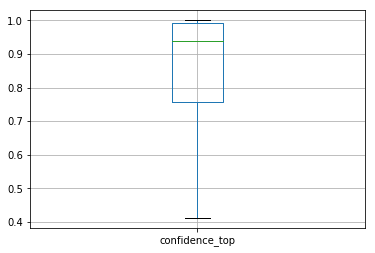

In [65]:
edf.boxplot(column='confidence_top', showfliers=False)

In [64]:
# what is the percentage of EXACT match 'eland' to the whole set.
len(edf)/float(len(df))

0.652287095574563